# LOAN APPROVAL PREDICTION 

In [229]:
import pandas as pd 
import numpy as np 
import pickle 
data=pd.read_csv("../dataset/loan_approval_dataset.csv")

In [230]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [231]:
data

loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        9200000   

       loan_amount   loan_term   cibil_score   residential_assets_value  \
0         29900000          12           778                    2400000   
1         12200000           8           417                    2700000   
2         29700000          20           506                    7100000   
3         30700000           8           467                   18200000   
4         24200000          20           382                   12400000   
...            ...         ...           ...                        ...   
4264       2300000          12           317                    2800000   
4265      11300000          20           559                    4200000   
4266      23900000          18           457                    1200000   
4267      12800000           8           780                    8200000   
4268      29700000          10           607                   17800000   

       commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                     17600000              22700000            8000000   
1                      2200000               8800000            3300000   
2                      4500000              33300000           12800000   
3                      3300000              23300000            7900000   
4                      8200000              29400000            5000000   
...                        ...                   ...                ...   
4264                    500000               3300000             800000   
4265                   2900000              11000000            1900000   
4266                  12400000              18100000            7300000   
4267                    700000              14100000            5800000   
4268                  11800000              35700000           12000000   

      loan_status  
0        Approved  
1        Rejected  
2        Rejected  
3        Rejected  
4        Rejected  
...           ...  
4264     Rejected  
4265     Approved  
4266     Rejected  
4267     Approved  
4268     Approved  

[4269 rows x 13 columns]

In [232]:
data[' loan_status']=data[' loan_status'].replace({" Approved":"Approved"," Rejected":"Rejected"})

# EDA

In [233]:
print("Shape of data with loan status as Approved:",data[data[' loan_status']=='Approved'].shape)
print("Shape of data with loan status as Rejected:",data[data[' loan_status']=='Rejected'].shape)

Shape of data with loan status as Approved: (2656, 13)
Shape of data with loan status as Rejected: (1613, 13)


In [234]:
print("Unique values of Education:",data.iloc[:,2].unique())
print("Unique values of Self employed:",data.iloc[:,3].unique())
print("Unique values of Loan Status:",data.iloc[:,12].unique())

Unique values of Education: [' Graduate' ' Not Graduate']
Unique values of Self employed: [' No' ' Yes']
Unique values of Loan Status: ['Approved' 'Rejected']


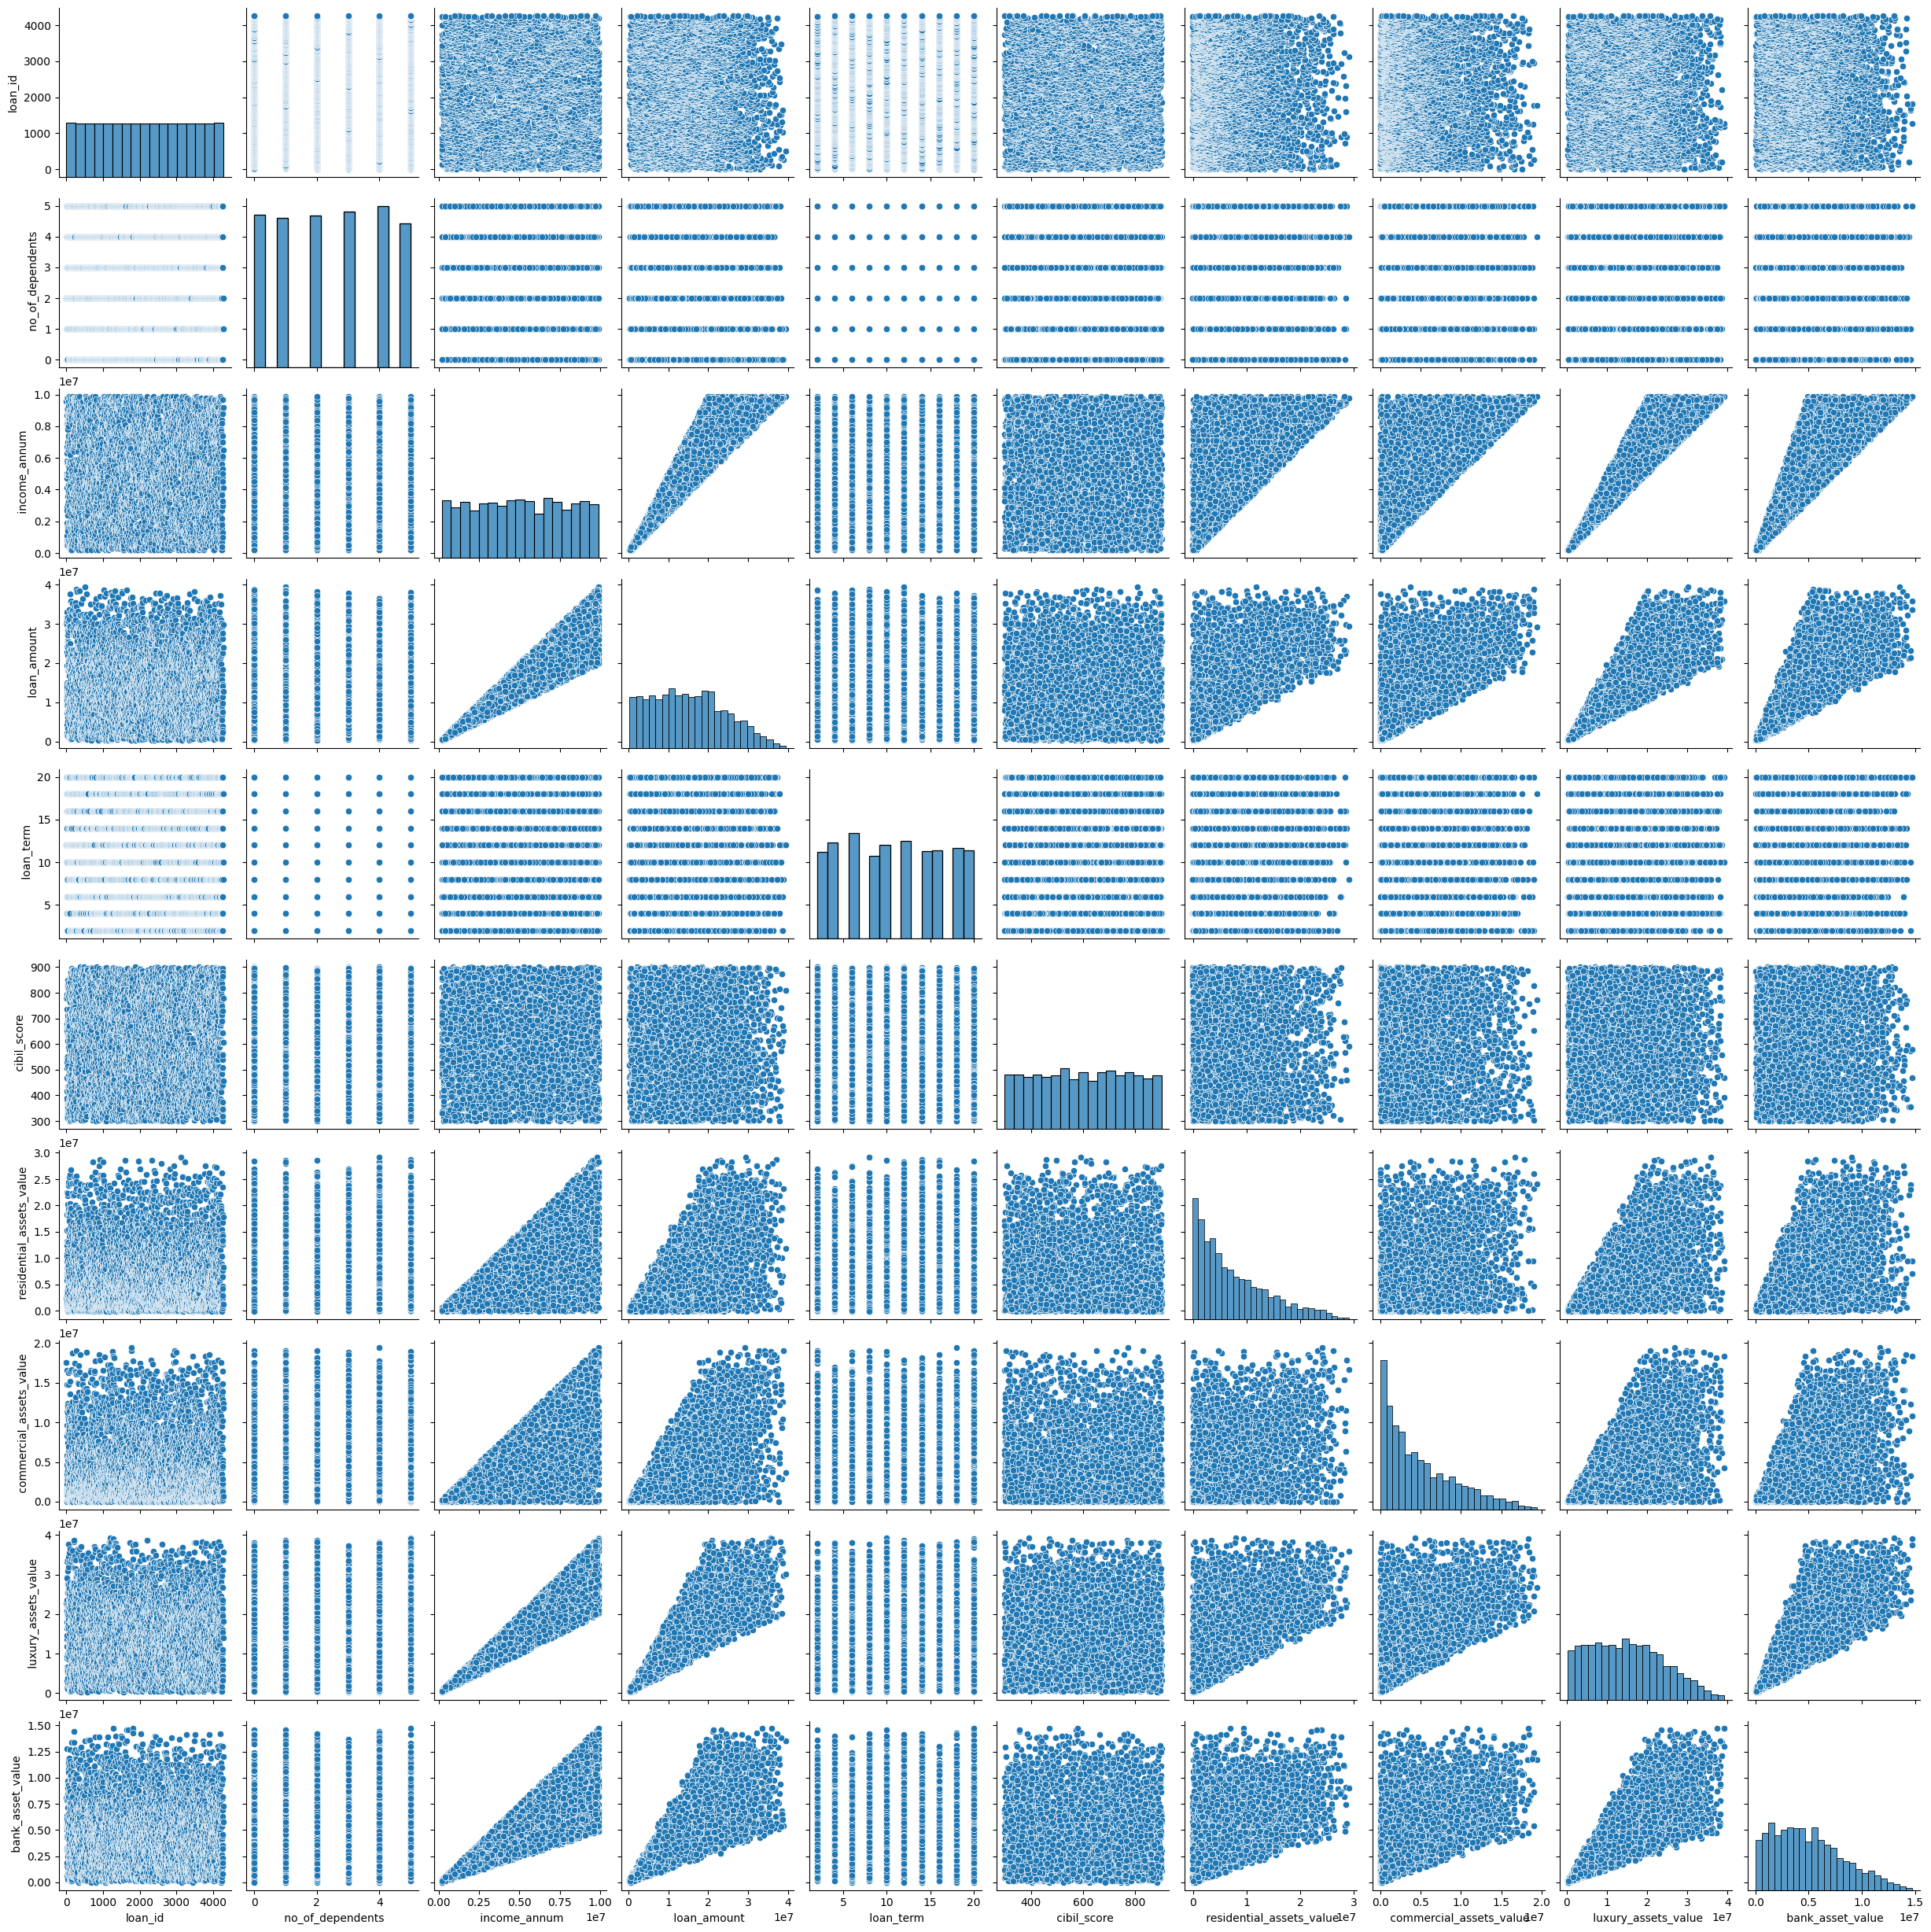

In [28]:
import seaborn as sns 
sns.pairplot(data)

In [235]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [236]:
data=data.drop(columns=['loan_id'])

## CHECKING THE DISTRIBUTION OF THE DATA


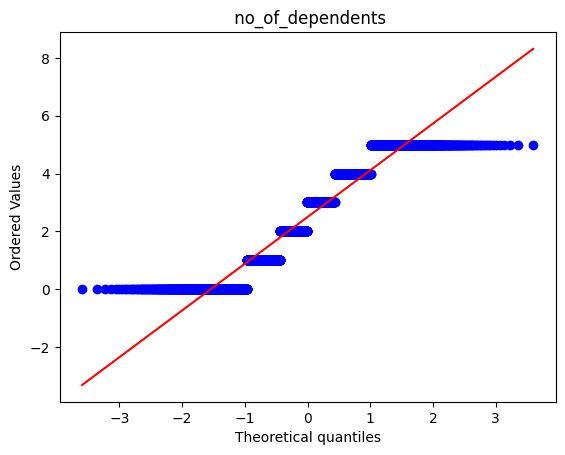

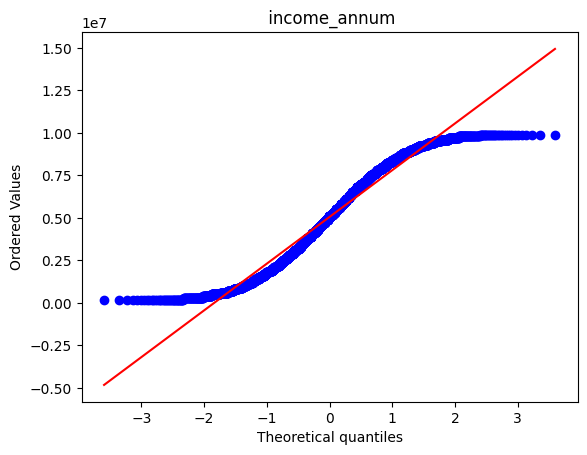

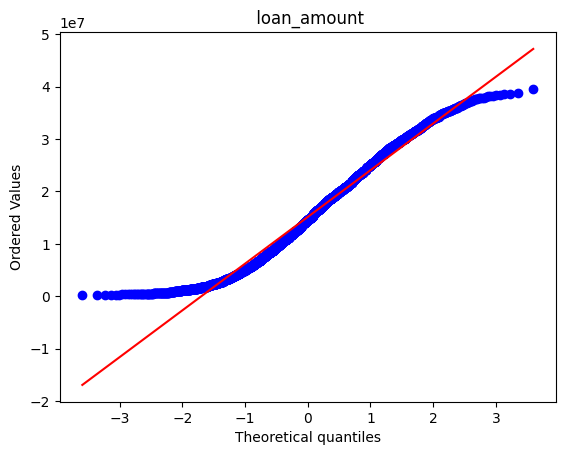

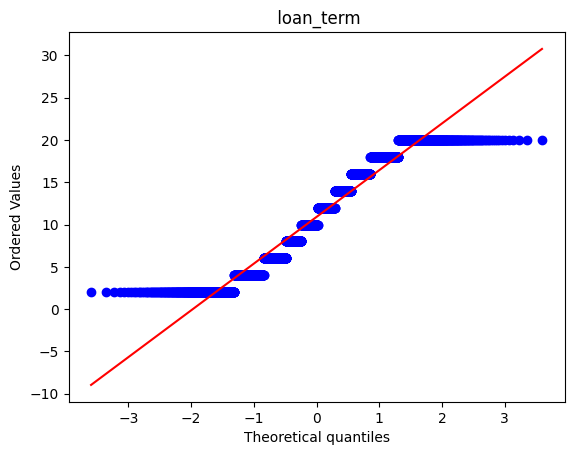

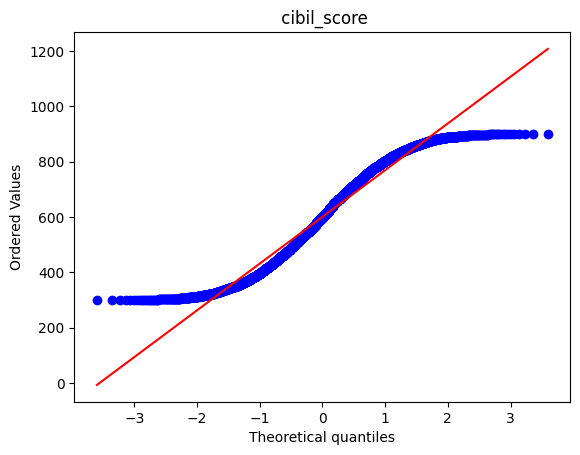

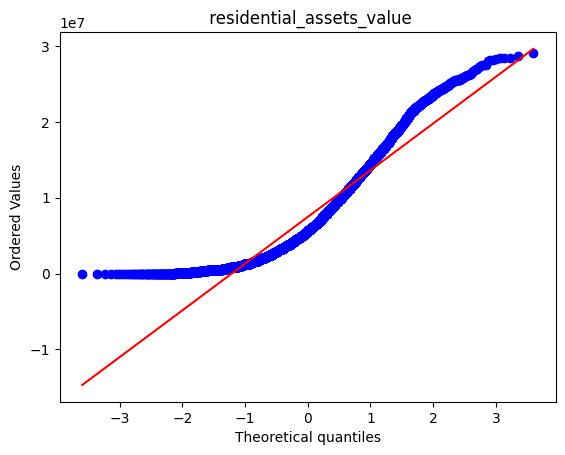

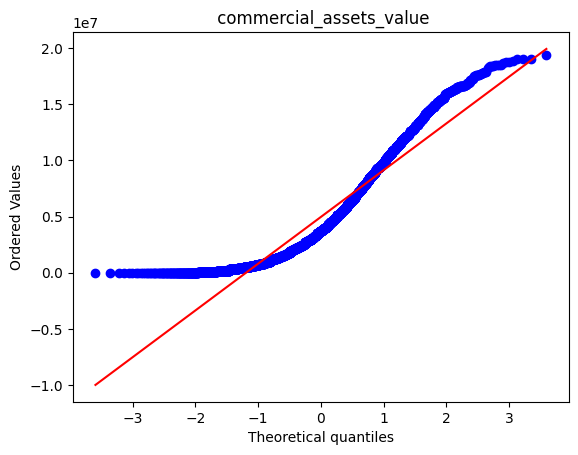

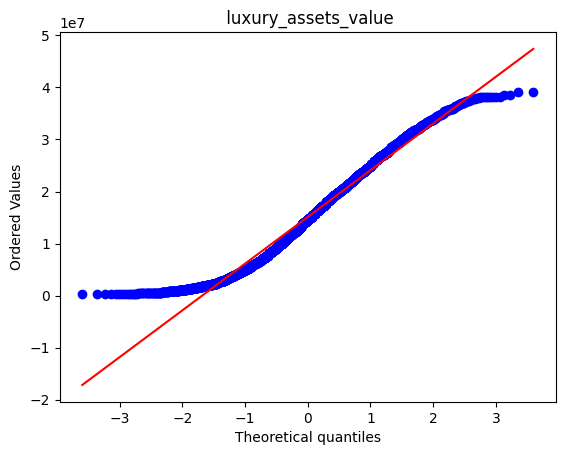

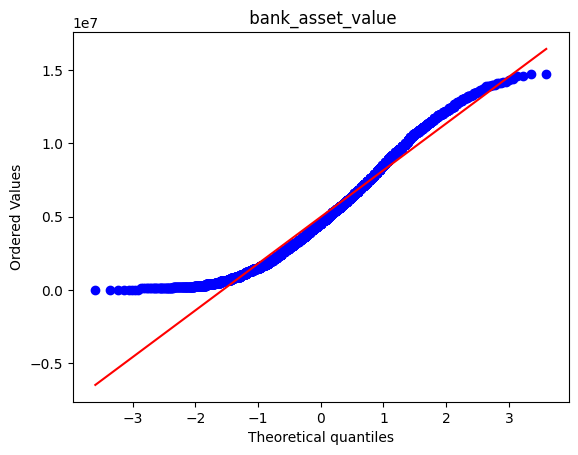

In [237]:
# Here no_of_dependents and loan_term are discrete variables
import matplotlib.pyplot as plt

num_features=[feature for feature in data.columns if data[feature].dtype!='O' and data[feature].dtype!='datetime']
import scipy.stats as stats 
for i in num_features:
    stats.probplot(data[i],dist='norm',plot=plt)
    plt.title(i)
    plt.show()


# Using Boxplot to check for outliers

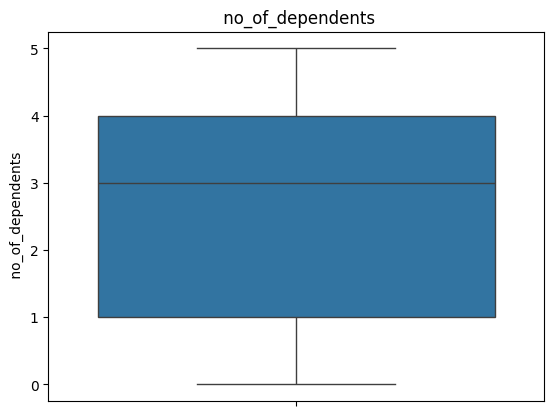

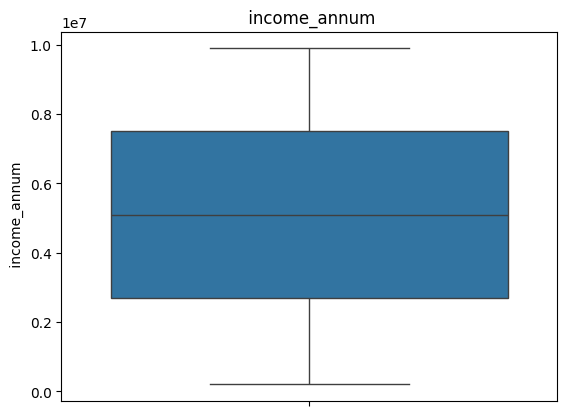

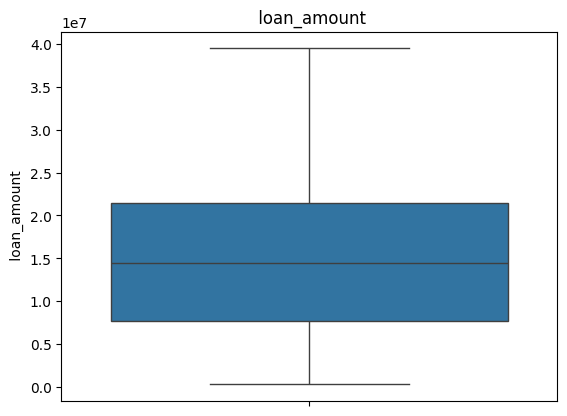

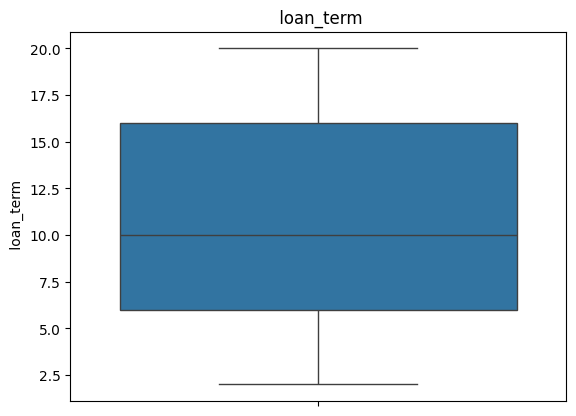

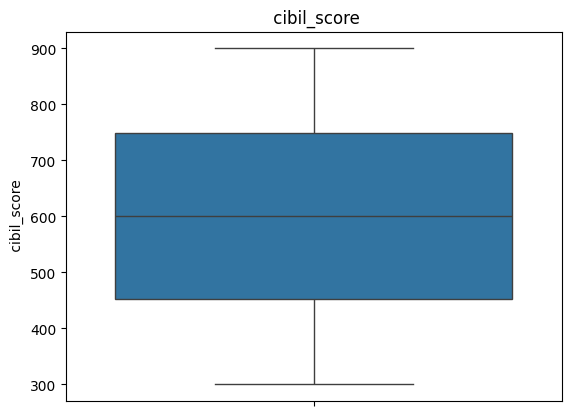

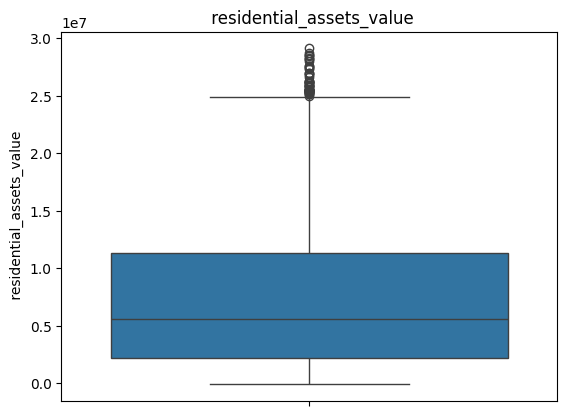

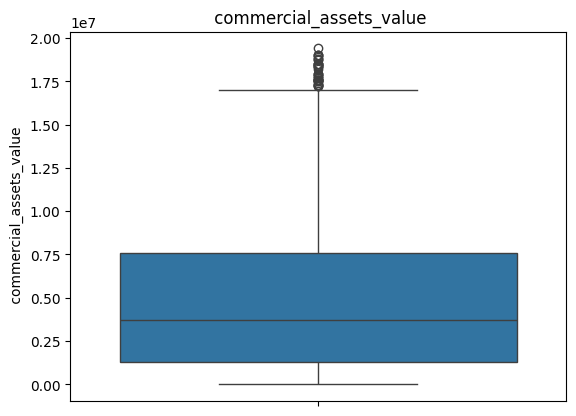

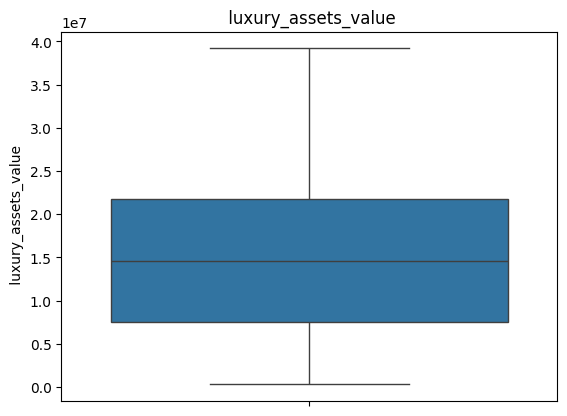

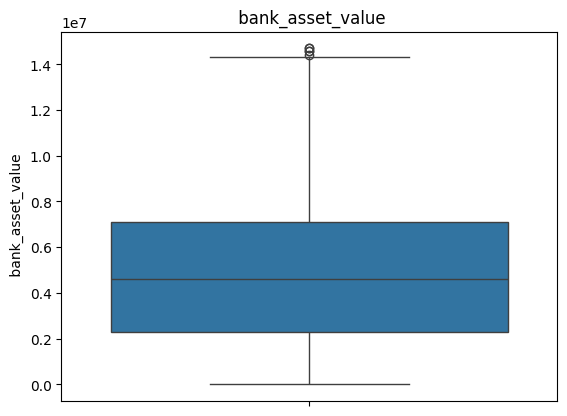

In [238]:
from collections import Counter
import seaborn as sns
for i in num_features:
    plt.title(i)
    sns.boxplot(data[i])
    plt.show()

# Checking the correlation between the proportion of Graduated vs Not Graduated who received approval for their loan


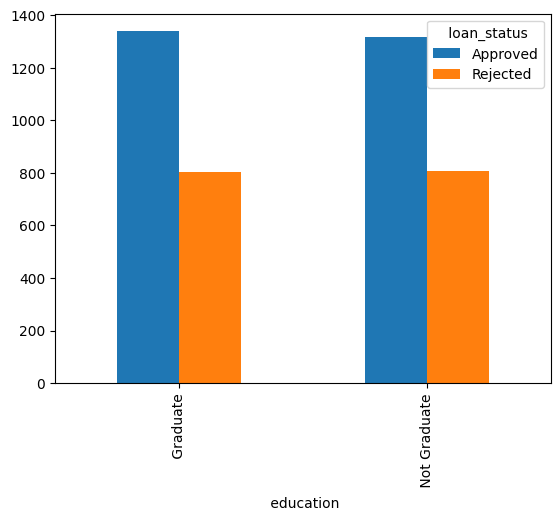

In [239]:
pd.crosstab(data[" education"],data[" loan_status"]).plot(kind='bar')
plt.show()

# Checking the correlation between the loan_status wrt the no_of_dependents


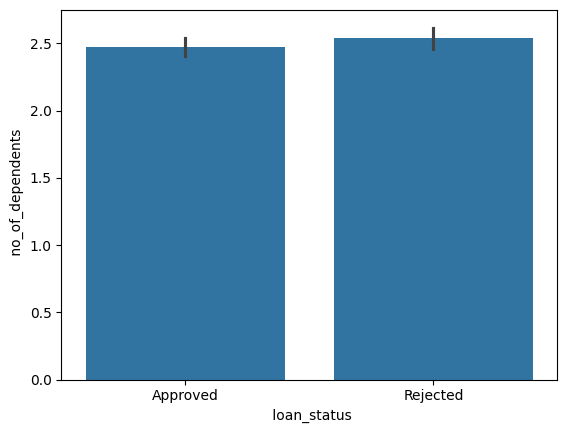

In [240]:
import seaborn as sns
sns.barplot(x=data[' loan_status'],y=data[' no_of_dependents'])
plt.show()

# Checking the correlation between the loan_status wrt the cibil_score


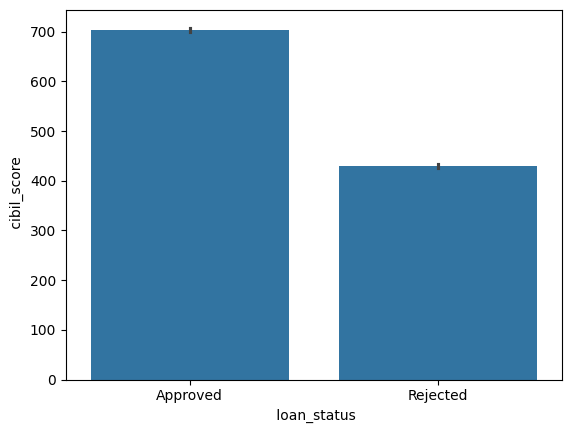

In [241]:
sns.barplot(x=data[' loan_status'],y=data[' cibil_score'])
plt.show()

# Checking the correlation between the loan_amount wrt the residential_assets_value


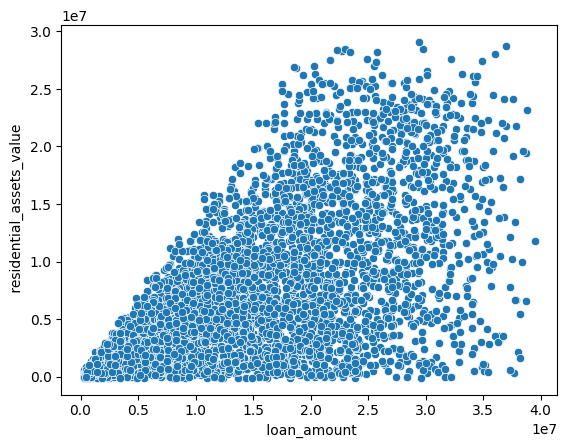

In [242]:
sns.scatterplot(x=data[" loan_amount"],y=data[" residential_assets_value"])
plt.show()

# Checking the correlation between the proportion of applicants who are self employed wrt the approval for the loan


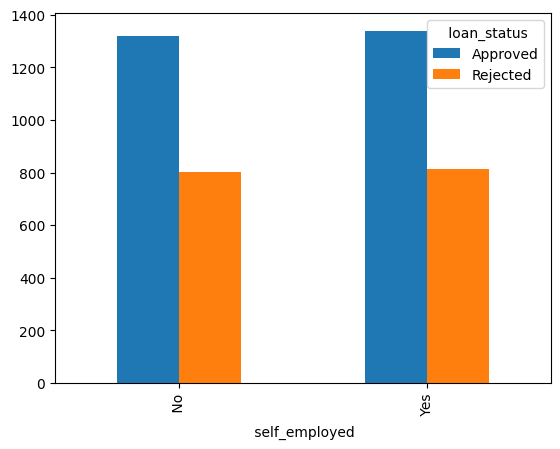

In [243]:
pd.crosstab(data[" self_employed"],data[" loan_status"]).plot(kind="bar")
plt.show()

# PREPROCESSING

In [244]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.2)
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [245]:
print("Shape of data with loan status as Approved before over sampling:",train[train[' loan_status']=='Approved'].shape)
print("Shape of data with loan status as Rejected before over sampling:",train[train[' loan_status']=='Rejected'].shape)

Shape of data with loan status as Approved before over sampling: (2149, 12)
Shape of data with loan status as Rejected before over sampling: (1266, 12)


In [246]:
x=train.iloc[:,0:10]
y=train.iloc[:,11]

In [247]:
from imblearn.over_sampling import SMOTENC 
sampler=SMOTENC(categorical_features=[' education', ' self_employed'])
x_resampled,y_resampled=sampler.fit_resample(x,y)

In [248]:
train=pd.concat([x_resampled,y_resampled],axis=1)

In [249]:
train

no_of_dependents      education self_employed  income_annum  \
0                    1   Not Graduate            No       8800000   
1                    5   Not Graduate           Yes       7000000   
2                    0       Graduate           Yes       6100000   
3                    4       Graduate            No       7800000   
4                    2       Graduate           Yes       4800000   
...                ...            ...           ...           ...   
4293                 3       Graduate            No       7958995   
4294                 2   Not Graduate            No       4956267   
4295                 2   Not Graduate           Yes       4227470   
4296                 1   Not Graduate           Yes       6406735   
4297                 2       Graduate            No       5491394   

      loan_amount  loan_term  cibil_score  residential_assets_value  \
0        30200000         18          897                  17100000   
1        24000000          6          336                   2300000   
2        19900000         20          761                   4500000   
3        25400000         18          425                   3000000   
4        17500000         20          381                    400000   
...           ...        ...          ...                       ...   
4293     29760555          8          316                  22032179   
4294     17031894         10          398                   3379943   
4295     11400000         12          468                   8227470   
4296     13916839         12          313                  18614594   
4297     12625816          8          434                   4173664   

      commercial_assets_value  luxury_assets_value loan_status  
0                     7900000             28700000    Approved  
1                    11900000             27500000    Rejected  
2                     3700000             12700000    Approved  
3                    14000000             30500000    Rejected  
4                     6900000             13400000    Rejected  
...                       ...                  ...         ...  
4293                  4589273             26048269    Rejected  
4294                  1570612             13041225    Rejected  
4295                  7276927             10036264    Rejected  
4296                  6314594             18575302    Rejected  
4297                  8651632             21022032    Rejected  

[4298 rows x 11 columns]

In [250]:
print("Shape of data with loan status as Approved after over sampling:",train[train[' loan_status']=='Approved'].shape)
print("Shape of data with loan status as Rejected after over sampling:",train[train[' loan_status']=='Rejected'].shape)

Shape of data with loan status as Approved after over sampling: (2149, 11)
Shape of data with loan status as Rejected after over sampling: (2149, 11)


In [251]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse_output=False)
one_hot_encoded=encoder.fit_transform(train[[' education',' self_employed']])
new_cols=pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out([' education',' self_employed']))
train=pd.concat([train,new_cols],axis=1)
train.reset_index(drop=True,inplace=True)
train.drop(columns=[' education',' self_employed'],inplace=True)

In [252]:
train['loan_status_encoded']=np.where(train[' loan_status']=="Rejected",0,1)

In [253]:
train

no_of_dependents   income_annum   loan_amount   loan_term  \
0                     1        8800000      30200000          18   
1                     5        7000000      24000000           6   
2                     0        6100000      19900000          20   
3                     4        7800000      25400000          18   
4                     2        4800000      17500000          20   
...                 ...            ...           ...         ...   
4293                  3        7958995      29760555           8   
4294                  2        4956267      17031894          10   
4295                  2        4227470      11400000          12   
4296                  1        6406735      13916839          12   
4297                  2        5491394      12625816           8   

       cibil_score   residential_assets_value   commercial_assets_value  \
0              897                   17100000                   7900000   
1              336                    2300000                  11900000   
2              761                    4500000                   3700000   
3              425                    3000000                  14000000   
4              381                     400000                   6900000   
...            ...                        ...                       ...   
4293           316                   22032179                   4589273   
4294           398                    3379943                   1570612   
4295           468                    8227470                   7276927   
4296           313                   18614594                   6314594   
4297           434                    4173664                   8651632   

       luxury_assets_value  loan_status   education_ Graduate  \
0                 28700000     Approved                   0.0   
1                 27500000     Rejected                   0.0   
2                 12700000     Approved                   1.0   
3                 30500000     Rejected                   1.0   
4                 13400000     Rejected                   1.0   
...                    ...          ...                   ...   
4293              26048269     Rejected                   1.0   
4294              13041225     Rejected                   0.0   
4295              10036264     Rejected                   0.0   
4296              18575302     Rejected                   0.0   
4297              21022032     Rejected                   1.0   

       education_ Not Graduate   self_employed_ No   self_employed_ Yes  \
0                          1.0                 1.0                  0.0   
1                          1.0                 0.0                  1.0   
2                          0.0                 0.0                  1.0   
3                          0.0                 1.0                  0.0   
4                          0.0                 0.0                  1.0   
...                        ...                 ...                  ...   
4293                       0.0                 1.0                  0.0   
4294                       1.0                 1.0                  0.0   
4295                       1.0                 0.0                  1.0   
4296                       1.0                 0.0                  1.0   
4297                       0.0                 1.0                  0.0   

      loan_status_encoded  
0                       1  
1                       0  
2                       1  
3                       0  
4                       0  
...                   ...  
4293                    0  
4294                    0  
4295                    0  
4296                    0  
4297                    0  

[4298 rows x 14 columns]

In [254]:
x=train.drop(columns=[' loan_status','loan_status_encoded'],axis=1)
y=train['loan_status_encoded']

In [255]:
# FEATURE SELECTION USING Mutual information

from sklearn.feature_selection import mutual_info_classif

MI=mutual_info_classif(x,y)
MI_values=pd.Series(MI)
MI_values.index=x.columns
MI_values.sort_values(ascending=False)

cibil_score                 0.538962
income_annum                0.114223
commercial_assets_value     0.099864
loan_term                   0.098239
residential_assets_value    0.085122
luxury_assets_value         0.058658
loan_amount                 0.048395
education_ Graduate         0.004156
self_employed_ No           0.003214
no_of_dependents            0.000000
education_ Not Graduate     0.000000
self_employed_ Yes          0.000000
dtype: float64

In [256]:
# FEATURE SELECTION USING FEATURE IMPORTANCE (Extratreesclassifier)

from sklearn.ensemble import ExtraTreesClassifier
feature_selector=ExtraTreesClassifier()
feature_selector.fit(x,y)
feature_importance=pd.DataFrame(feature_selector.feature_importances_,index=x.columns,columns=["Importance"])
feature_importance.sort_values('Importance',ascending=False)

Importance
cibil_score                 0.686570
loan_term                   0.064390
loan_amount                 0.043009
residential_assets_value    0.039994
luxury_assets_value         0.038940
commercial_assets_value     0.037912
income_annum                0.037788
no_of_dependents            0.027988
education_ Not Graduate     0.006202
education_ Graduate         0.006180
self_employed_ Yes          0.005691
self_employed_ No           0.005335

In [257]:
train.to_csv('../dataset/train_data_preprocessed.csv',index=False)
test.to_csv('../dataset/test_data.csv',index=False)

# MODEL BUILDING BASED ON THE FEATURES : CIBIL SCORE AND LOAN TERM

In [258]:
#Train test for model training
from sklearn.metrics import accuracy_score
X=train[[' loan_term',' cibil_score']].values
y=train[' loan_status'].values

X_test=test[[' loan_term',' cibil_score']].values
y_test=test[' loan_status'].values

In [259]:
train[' cibil_score']

0       897
1       336
2       761
3       425
4       381
       ... 
4293    316
4294    398
4295    468
4296    313
4297    434
Name:  cibil_score, Length: 4298, dtype: int64

# USING OPTUNA

In [260]:
import optuna
from IPython.display import clear_output
clear_output()

In [261]:
#OPTUNA CONFIG FOR RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
def objective(trail,data=X,target=y):
    param={
        "n_estimators":trail.suggest_categorical('n_estimators',[100,300,500]),
        "max_depth":trail.suggest_categorical("max_depth",[4,8,16,32,64,128]),
        "min_samples_split":trail.suggest_categorical("min_samples_split",[2,3,4,8,16,32,64,128]),
        "min_samples_leaf":trail.suggest_categorical("min_samples_leaf",[3,4,5,6,7,8,9,11,12]),
        "criterion":trail.suggest_categorical("criterion",['gini', 'log_loss', 'entropy'])
    }
    rforest=RandomForestClassifier(**param)
    rforest.fit(X,y)
    y_pred=rforest.predict(X_test)
    return accuracy_score(y_test,y_pred)


In [262]:
find_param=optuna.create_study()
find_param.optimize(objective,n_trials=5)

[I 2025-01-15 14:40:36,546] A new study created in memory with name: no-name-429bc5bb-ee27-41ff-95a2-aa4ce2d48efe
[I 2025-01-15 14:40:37,170] Trial 0 finished with value: 0.9543325526932084 and parameters: {'n_estimators': 100, 'max_depth': 16, 'min_samples_split': 32, 'min_samples_leaf': 8, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.9543325526932084.
[I 2025-01-15 14:40:38,584] Trial 1 finished with value: 0.949648711943794 and parameters: {'n_estimators': 300, 'max_depth': 4, 'min_samples_split': 128, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 1 with value: 0.949648711943794.
[I 2025-01-15 14:40:39,105] Trial 2 finished with value: 0.9566744730679156 and parameters: {'n_estimators': 100, 'max_depth': 16, 'min_samples_split': 64, 'min_samples_leaf': 11, 'criterion': 'entropy'}. Best is trial 1 with value: 0.949648711943794.
[I 2025-01-15 14:40:41,879] Trial 3 finished with value: 0.955503512880562 and parameters: {'n_estimators': 500, 'max_depth': 64, 'min

In [263]:
params=find_param.best_trial.params
Rforest=RandomForestClassifier(**params)
Rforest.fit(X,y)
print(f"Training score for random forest classifier: {Rforest.score(X,y)}")
y_pred=Rforest.predict(X_test)
print(f"Testing score for random forest classifier: {accuracy_score(y_test,y_pred)}")
result=Rforest.predict([[12,778]])
print(result)

Training score for random forest classifier: 0.960679385760819
Testing score for random forest classifier: 0.9484777517564403
['Approved']


In [268]:
pickle.dump(Rforest,open("../models/RandomForestModel.sav",'wb'))

In [443]:
#OPTUNA CONFIG FOR GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
def objective(trail,data=X,target=y):
    param={
        "criterion":trail.suggest_categorical("criterion",["friedman_mse", "squared_error"]),
        "n_estimators":trail.suggest_categorical('n_estimators',[100,300,500]),
        "max_depth":trail.suggest_categorical("max_depth",[4,8,16,32,64,128]),
        "min_samples_split":trail.suggest_categorical("min_samples_split",[2,3,4,8,16,32,64,128]),
        "min_samples_leaf":trail.suggest_categorical("min_samples_leaf",[3,4,5,6,7,8,9,11,12]),
    }
    gb=GradientBoostingClassifier(**param)
    gb.fit(X,y)
    y_pred=gb.predict(X_test)
    return accuracy_score(y_test,y_pred)
    

In [444]:
best_param=optuna.create_study()
best_param.optimize(objective,n_trials=5)

[I 2024-10-26 19:37:34,031] A new study created in memory with name: no-name-714377ac-8583-4b48-b3aa-19fbfac29070
[I 2024-10-26 19:37:34,499] Trial 0 finished with value: 0.9426229508196722 and parameters: {'criterion': 'squared_error', 'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 16, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9426229508196722.
[I 2024-10-26 19:37:36,816] Trial 1 finished with value: 0.9461358313817331 and parameters: {'criterion': 'friedman_mse', 'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9426229508196722.
[I 2024-10-26 19:37:42,867] Trial 2 finished with value: 0.949648711943794 and parameters: {'criterion': 'friedman_mse', 'n_estimators': 300, 'max_depth': 32, 'min_samples_split': 32, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9426229508196722.
[I 2024-10-26 19:37:48,309] Trial 3 finished with value: 0.949648711943794 and parameters: {'criterion': 'friedman_mse

In [445]:
params=best_param.best_trial.params
gb=GradientBoostingClassifier(**params)
gb.fit(X,y)
print(f"Training score for Gradient boosting classifier: {gb.score(X,y)}")
y_pred=gb.predict(X_test)
print(f"Testing score for Gradient boosting classifier: {accuracy_score(y_test,y_pred)}")
result=gb.predict([[12,778]])
print(result)

Training score for Gradient boosting classifier: 0.9780380673499268
Testing score for Gradient boosting classifier: 0.9426229508196722
[' Approved']


In [265]:
#OPTUNA CONFIG FOR ADABOOSTING
from sklearn.ensemble import AdaBoostClassifier
def objective(trail,data=X,target=y):
    param={
        "learning_rate":trail.suggest_categorical("learning_rate",[.00001,.0003,.008,.02,.01,1,8]),
        "n_estimators":trail.suggest_categorical('n_estimators',[100,300,500]),
    }
    ab=AdaBoostClassifier(**param)
    ab.fit(X,y)
    y_pred=ab.predict(X_test)
    return accuracy_score(y_test,y_pred)

In [266]:
best_param=optuna.create_study()
best_param.optimize(objective,n_trials=5)

[I 2025-01-15 14:40:45,788] A new study created in memory with name: no-name-5670db57-b28f-4f66-9a98-b54238100787
[I 2025-01-15 14:40:51,353] Trial 0 finished with value: 0.9519906323185011 and parameters: {'learning_rate': 1, 'n_estimators': 500}. Best is trial 0 with value: 0.9519906323185011.
[I 2025-01-15 14:40:57,200] Trial 1 finished with value: 0.9473067915690867 and parameters: {'learning_rate': 1e-05, 'n_estimators': 500}. Best is trial 1 with value: 0.9473067915690867.
[I 2025-01-15 14:41:02,542] Trial 2 finished with value: 0.9473067915690867 and parameters: {'learning_rate': 8, 'n_estimators': 500}. Best is trial 1 with value: 0.9473067915690867.
[I 2025-01-15 14:41:03,660] Trial 3 finished with value: 0.9473067915690867 and parameters: {'learning_rate': 8, 'n_estimators': 100}. Best is trial 1 with value: 0.9473067915690867.
[I 2025-01-15 14:41:06,849] Trial 4 finished with value: 0.9473067915690867 and parameters: {'learning_rate': 0.01, 'n_estimators': 300}. Best is tria

In [267]:
params=best_param.best_trial.params
Ada=AdaBoostClassifier(**params)
Ada.fit(X,y)
print(f"Training score for Adaboosting classifier: {Ada.score(X,y)}")
y_pred=Ada.predict(X_test)
print(f"Testing score for Adaboosting classifier: {accuracy_score(y_test,y_pred)}")
result=Ada.predict([[12,778]])
print(result)

Training score for Adaboosting classifier: 0.9602140530479293
Testing score for Adaboosting classifier: 0.9473067915690867
['Approved']


# USING GRID SEARCH 

In [269]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#for random forest classifier
Re=RandomForestClassifier()
params={
        "n_estimators":[100,200,300],
        "max_depth":[4,8,16,32,64],
        "min_samples_split":[2,3,4,8,16,32],
        "min_samples_leaf":[3,4,5,6,7,8],
        "criterion":['gini', 'log_loss', 'entropy']
    }
gridsearch_randomf=GridSearchCV(Re,param_grid=params,cv=5)
gridsearch_randomf.fit(X,y)

In [453]:
randomforest_mod1=gridsearch_randomf.best_estimator_
randomforest_mod1.fit(X,y)
print(f"Training score for random forest classifier: {randomforest_mod1.score(X,y)}")
y_pred=randomforest_mod1.predict(X_test)
print(f"Testing score for random forest classifier: {accuracy_score(y_test,y_pred)}")

Training score for random forest classifier: 0.9742313323572475
Testing score for random forest classifier: 0.9484777517564403


In [ ]:
#for gradient boosting
GB=GradientBoostingClassifier()
params={
    "n_estimators":[100,200,300],
        "max_depth":[3,4,8,16,32],
        "min_samples_split":[2,3,4,8,16],
        "min_samples_leaf":[3,4,5,6,7,8],
        "criterion":["friedman_mse", "squared_error"]
}
gridsearch_gradboost=GridSearchCV(GB,param_grid=params,cv=5)
gridsearch_gradboost.fit(X,y)

In [46]:
gradboost_mod1=gridsearch_gradboost.best_estimator_
gradboost_mod1.fit(X,y)
print(f"Training score for Gradient Boosting classifier: {gradboost_mod1.score(X,y)}")
y_pred=gradboost_mod1.predict(X_test)
print(f"Testing score for Gradient Boosting classifier: {accuracy_score(y_test,y_pred)}")

Training score for random forest classifier: 1.0
Testing score for random forest classifier: 1.0


In [47]:
#for Adaboosting 
ada=AdaBoostClassifier()
params={
    "n_estimators":[100,200,300],
    "learning_rate":[.00001,.0003,.008,.02,.01,1,8],

}
gridsearch_adab=GridSearchCV(ada,param_grid=params,cv=5)
gridsearch_adab.fit(X,y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [1e-05, 0.0003, 0.008, 0.02, 0.01, 1,
                                           8],
                         'n_estimators': [100, 200, 300]})

In [48]:
adaboost_mod1=gridsearch_adab.best_estimator_
adaboost_mod1.fit(X,y)
print(f"Training score for Adaboost classifier: {adaboost_mod1.score(X,y)}")
y_pred=adaboost_mod1.predict(X_test)
print(f"Testing score for Adaboost classifier: {accuracy_score(y_test,y_pred)}")

Training score for Adaboost classifier: 1.0
Testing score for Adaboost classifier: 1.0
